# Medical Data Visualizer


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('medical_examination.csv')
df.shape

(70000, 13)

In [4]:
df.columns

Index(['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [5]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Adding an overweight column to the dataset. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.


In [6]:
bmi = df['weight'] / ((df['height'] / 100) ** 2)

df['overweight'] = np.where(bmi > 25, 1, 0)

In [7]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.



In [31]:
df['cholesterol'] = np.where(df['cholesterol'] == 1, 0, 1)
df['gluc'] = np.where(df['gluc'] == 1, 0, 1)

Ahora se va a visualizar una grafica de barras de varias variables en función de la variable binaria cardio

In [47]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'cholesterol', 'gluc', 'overweight', 'smoke', 'alco']) # se ajusta este formato para el uso de la librería seaborn

In [38]:
df_cat['total'] = 1 # Esto se hace para poder contar el número de ocurrencias de cada categoría en la siguiente linea de código.
df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).count() # agrupa el DataFrame por las columnas 
#‘cardio’, ‘variable’ y ‘value’, y cuenta el número de ocurrencias de cada grupo. El resultado es un nuevo DataFrame donde cada fila representa una combinación
# única de ‘cardio’, ‘variable’ y ‘value’, y la columna ‘total’ contiene el recuento de cada combinación.

df_cat

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,5691
5,0,cholesterol,1,29330
6,0,gluc,0,4127
7,0,gluc,1,30894
8,0,overweight,0,15915
9,0,overweight,1,19106


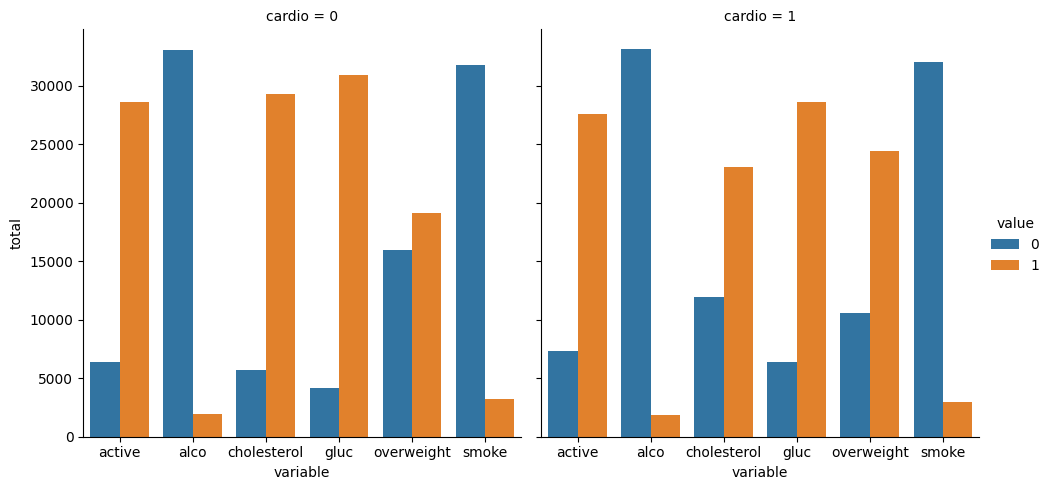

In [36]:
sns.catplot(x='variable', y='total', data=df_cat, hue='value', kind='bar', col='cardio')

Clean the data. Filter out the following patient segments that represent incorrect data:

* diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
* height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
* height is more than the 97.5th percentile
* weight is less than the 2.5th percentile
* weight is more than the 97.5th percentile


In [50]:
df_heat = df[
        
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
]

Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.


<Axes: >

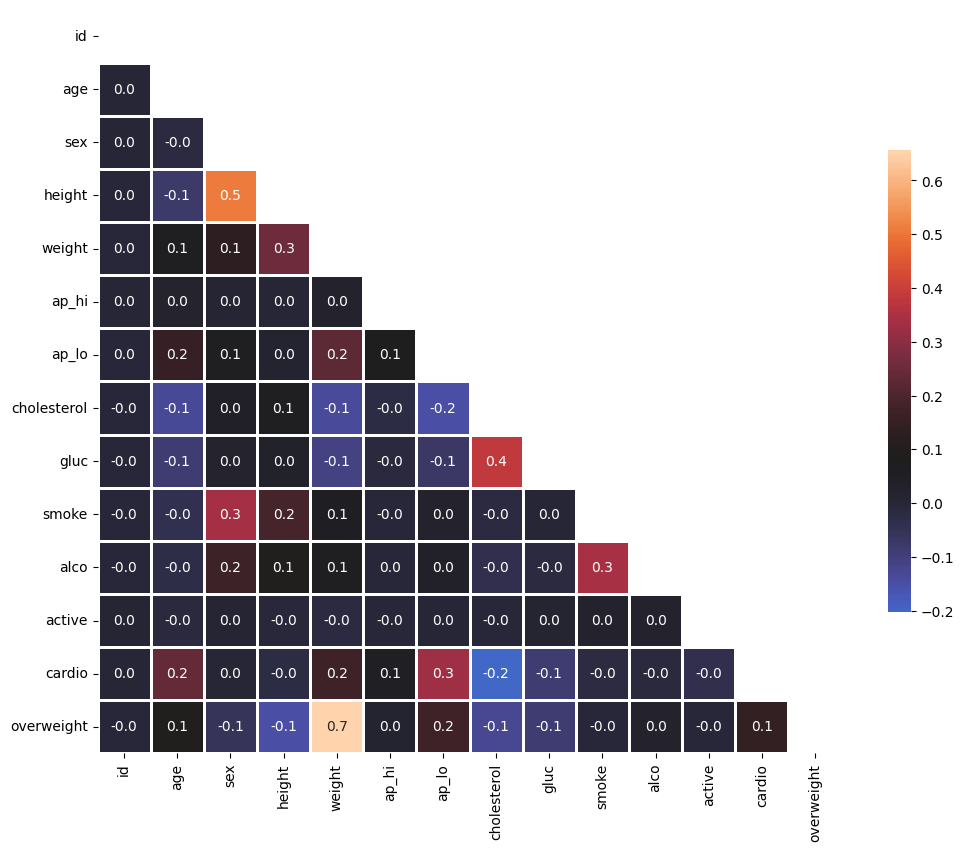

In [62]:
# Calculate the correlation matrix
corr = df_heat.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.triu(corr)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr, linewidths=1, annot=True, fmt='.1f', square=True, mask=mask, center=0.08, cbar_kws={"shrink":0.5})